1. Import Library
Import library dasar yang diperlukan yaitu pandas, numpy, matplotlib, dan seaborn.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


2. Import Dataset
Download terlebih dahulu data customer pada link sebelumnya dan lakukan import dataset.

In [50]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


fitur/variabel yang akan digunakan untuk clustering hanya 2 yaitu “Annual Income” dan “Spending Score” agar hasil cluster nantinya dapat divisualisasikan pada bidang 2 dimensi.

In [51]:
# Hanya mengambil fitur "Annual Income" dan "Spending Score"
X = dataset.iloc[:, 3:5] # 3:5 artinya adalah mengambil kolom index 3 sampai 4 (atau 5-1)
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


3. Eksplorasi Data
Data terdiri dari 200 baris atau terdapat 200 customer. Karena kolomnya sudah direduksi, maka kolom sekarang hanya ada 2 yaitu “Annual Income” dan “Spending Score”.
Tidak terdapat data yang missing.

In [52]:
# Cek data missing
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [53]:
# Ringkasan data
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Terlihat bahwa rata-rata pendapatan tahunan dari customer adalah sebesar $60.560 dan rata-rata score pengeluarannya adalah sebesar 50,2.

4. Menentukan Jumlah Cluster (k)
Metode Elbow adalah salah satu cara dalam menentukan jumlah cluster (k) yang paling tepat untuk pemodelan K-Means. Jumlah cluster yang optimum ditunjukkan pada belokan atau siku dari grafik elbow.

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

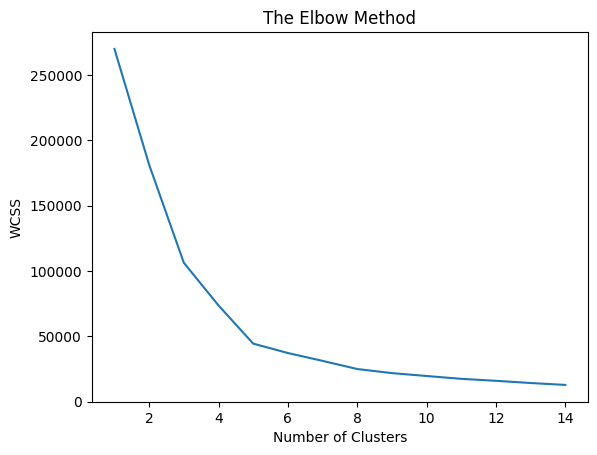

In [54]:
wcss = [] # wcss -> Within Cluster Sum of Squares
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Visualisasi Metode Elbow
plt.plot(range(1, 15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

Dari grafik Elbow, terlihat bahwa belokan atau siku terjadi pada jumlah cluster 5 sehingga inilah jumlah cluster yang akan digunakan pada metode K-Means.

5. Clustering Menggunakan K-Means

In [55]:
# Pakai cluster = 5
kmeans = KMeans(n_clusters = 5, random_state = 14)
kmeans.fit(X)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=14)

6. Melihat Hasil Cluster
Hasil cluster untuk masing-masing data dapat dilihat dengan menggunakan atribut “labels_” atau menggunakan fungsi “fit_predict()”.

In [56]:
kmeans.labels_
# Cara lain untuk melihat hasil cluster
# y_pred = kmeans.fit_predict(X)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

Kemudian, menggabungkan hasil cluster ke dalam data frame sebelumnya (X) dengan nama objek yang lain yaitu “hasil_kmeans”.

In [57]:
hasil_kmeans = X.copy()
hasil_kmeans["cluster"] = kmeans.labels_
hasil_kmeans.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


7. Visualisasi Hasil Clustering
Grafik batang yang menunjukkan frekuensi data pada masing-masing cluster adalah sebagai berikut.

Text(0, 0.5, 'Frekuensi')

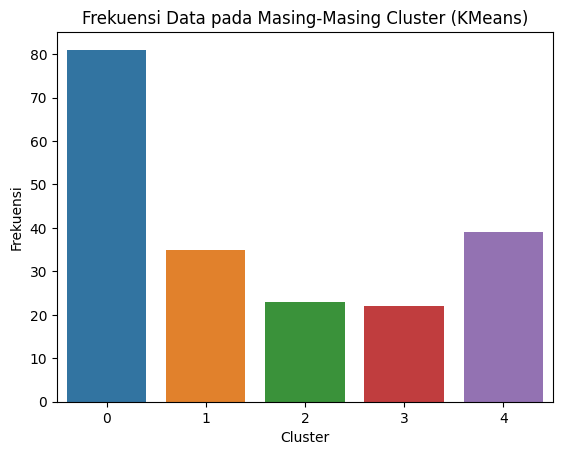

In [58]:
# Nilai untuk sumbu X dan Y
cluster_x = hasil_kmeans["cluster"].value_counts().index
cluster_y = hasil_kmeans["cluster"].value_counts().values
# Visualisasi
sns.barplot(x=cluster_x, y=cluster_y)
plt.title("Frekuensi Data pada Masing-Masing Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

Terlihat bahwa mayoritas data masuk ke dalam cluster 0 (nantinya disebut sebagai “Cluster 1”). Penulisan cluster 0 (nol) di sini dikarenakan mengikuti index dari Python sendiri yaitu index awal = 0.

Untuk membuat visualisasi scatter plot dari masing-masing cluster, terlebih dahulu mendefinisikan nilai fitur/variabel dari masing-masing cluster. Tidak lupa juga mendefinisikan pusat dari cluster (centroid) dengan menggunakan atribut “cluster_centers_”.

In [59]:
# Nilai fitur/variabel dari masing-masing cluster
ann_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"] == 0].iloc[:, 0]
spend_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"] == 0].iloc[:, 1]
ann_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"] == 1].iloc[:, 0]
spend_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"] == 1].iloc[:, 1]
ann_kmeans2 = hasil_kmeans[hasil_kmeans["cluster"] == 2].iloc[:, 0]
spend_kmeans2 = hasil_kmeans[hasil_kmeans["cluster"] == 2].iloc[:, 1]
ann_kmeans3 = hasil_kmeans[hasil_kmeans["cluster"] == 3].iloc[:, 0]
spend_kmeans3 = hasil_kmeans[hasil_kmeans["cluster"] == 3].iloc[:, 1]
ann_kmeans4 = hasil_kmeans[hasil_kmeans["cluster"] == 4].iloc[:, 0]
spend_kmeans4 = hasil_kmeans[hasil_kmeans["cluster"] == 4].iloc[:, 1]
# Pusat dari cluster (centroid)
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

Visualisasi scatter plot dilakukan dengan code sebagai berikut.

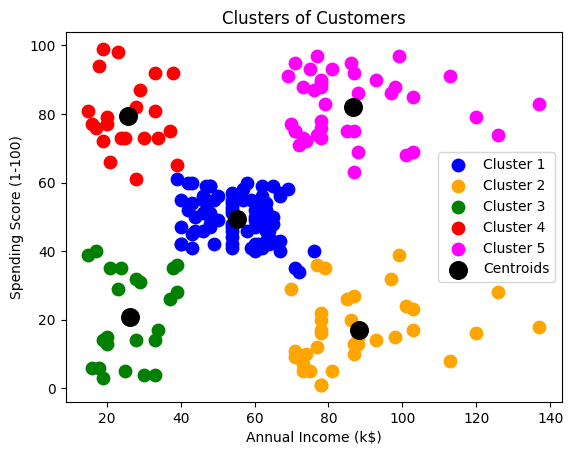

In [60]:
# VISUALISASI HASIL CLUSTERING
plt.scatter(ann_kmeans0, spend_kmeans0, s = 80, c = "blue", label = "Cluster 1")
plt.scatter(ann_kmeans1, spend_kmeans1, s = 80, c = "orange", label = "Cluster 2")
plt.scatter(ann_kmeans2, spend_kmeans2, s = 80, c = "green", label = "Cluster 3")
plt.scatter(ann_kmeans3, spend_kmeans3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_kmeans4, spend_kmeans4, s = 80, c = "magenta", label = "Cluster 5")
# Centroid
plt.scatter(centroid_cluster[:, 0], centroid_cluster[:, 1], s = 160, c = "black", label = "Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

8. Interpretasi Hasil Clustering
Dengan melihat hasil scatter plot, kita dapat mengetahui perbedaan perilaku dari customer pada masing-masing cluster sebagai berikut:

- Cluster 1 -> Annual Income SEDANG, Spending Score SEDANG
- Cluster 2 -> Annual Income RENDAH, Spending Score RENDAH
- Cluster 3 -> Annual Income TINGGI, Spending Score RENDAH
- Cluster 4 -> Annual Income RENDAH, Spending Score TINGGI
- Cluster 5 -> Annual Income TINGGI, Spending Score TINGGI


Dari hasil cluster ini, kita dapat menerapkan strategi tertentu untuk cluster tertentu. Misalnya adalah aktif melakukan iklan atau penawaran kepada customer di cluster 3 karena mereka memiliki pendapatan yang tinggi, namun score pengeluarannya masih rendah. Hal ini bertujuan agar customer dari cluster 3 dapat semakin banyak melakukan pengeluaran/pembelian di toko kita. Customer di cluster 5 dapat dikatakan sebagai customer yang loyal karena selain memiliki pendapatan yang tinggi, mereka juga melakukan pengeluaran/pembelian yang tinggi pula di toko kita. Strategi yang dapat dilakukan pada cluster 5 ini adalah dengan memberikan reward atau penawaran khusus agar mereka semakin loyal kepada toko kita.

9. Menggabungkan Kembali dengan Identitas Data (Customer ID)

In [61]:
# Memasukkan kembali "Customer ID"-nya
hasil_kmeans["CustomerID"] = dataset["CustomerID"]
hasil_kmeans.head()

,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,15,39,2,1
1,15,81,3,2
2,16,6,2,3
3,16,77,3,4
4,17,40,2,5
